# Desafío - Regularización

- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Regularización.

## Requerimientos
- En esta ocasión utilizaremos datos de la composición química de muestras de vino.
- Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
- Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    - Identifique el tipo de datos de cada columna.
    - Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
    - Encuentre la cantidad de valores faltantes en cada columna.
    - Grafique la distribución empírica de cada atributo

### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías básicas.
- Importe los métodos asociados a regularización.
- Importe la base de datos.

In [1]:
# Utiliza esta celda para realizar los import requeridos y lectura del set de datos

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV 


df = pd.read_csv("winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Ejercicio 2: Análisis exploratorio
- Identifique el tipo de datos de cada columna.
- Identifique outliers univariados y multivariados.
    - Los primeros los puede encontrar realizando boxplots de cada atributo.
    - Los segundos estudiando los scatterplot entre pares de atributos.

In [2]:
# Utiliza esta celda para identificar el tipo de dato de cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Comentarios**

Las variables o columnas como se puede apreciar son del tipo continua y son en su mayoría del tipo decimal a excepción de quality que es del tipo entero.

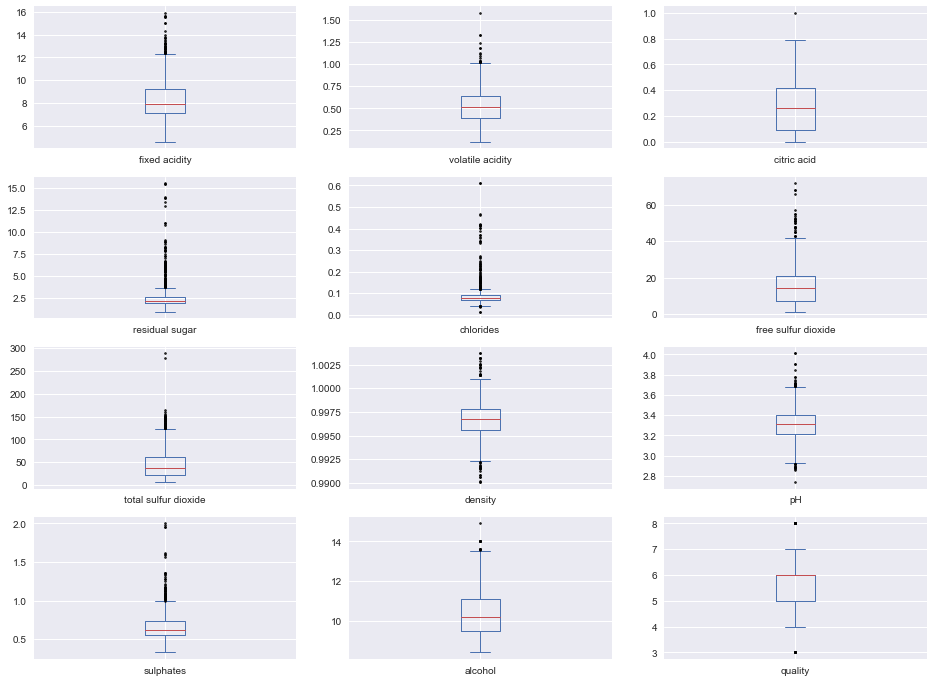

In [3]:
# Utiliza esta celda para graficar boxplots. Tip: Utilizar df.plot(subplots=True, kind="box")

#df.plot(subplots=True, kind="box");

df.plot(subplots=True, kind="box", layout=(4,3), figsize=(16, 12), flierprops={'markersize':1.5}, sharex=False, sharey=False);

**Comentarios**

Se aprecia en los boxplot que en su gran mayoría las variables tienen una gran cantidad de valores atipicos y por lo general estos son valores altos.  
 

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

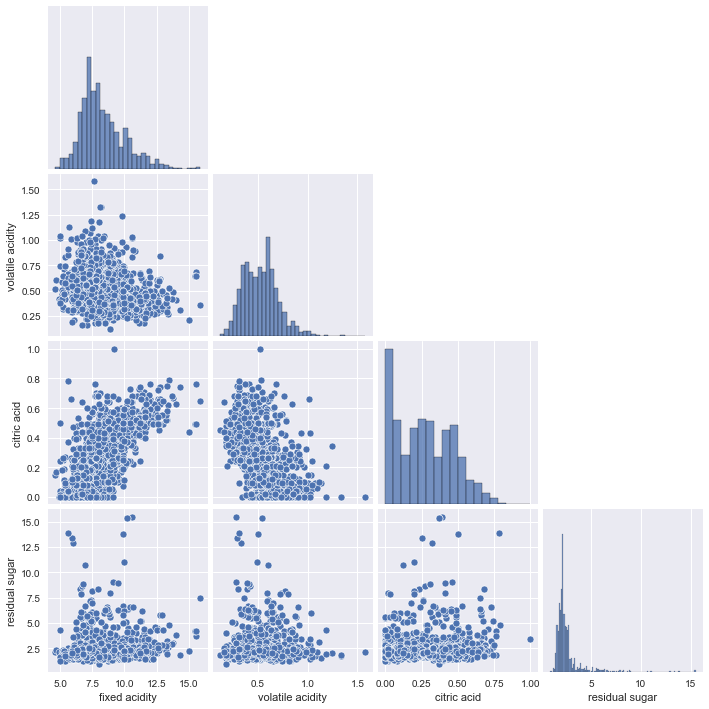

In [5]:
# Utiliza esta celda para graficar scatterplot. Tip: Utilizar pairplot de Seaborn con corner=True. 
#Puedes usar más celdas para graficar subsets

sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']], corner=True);


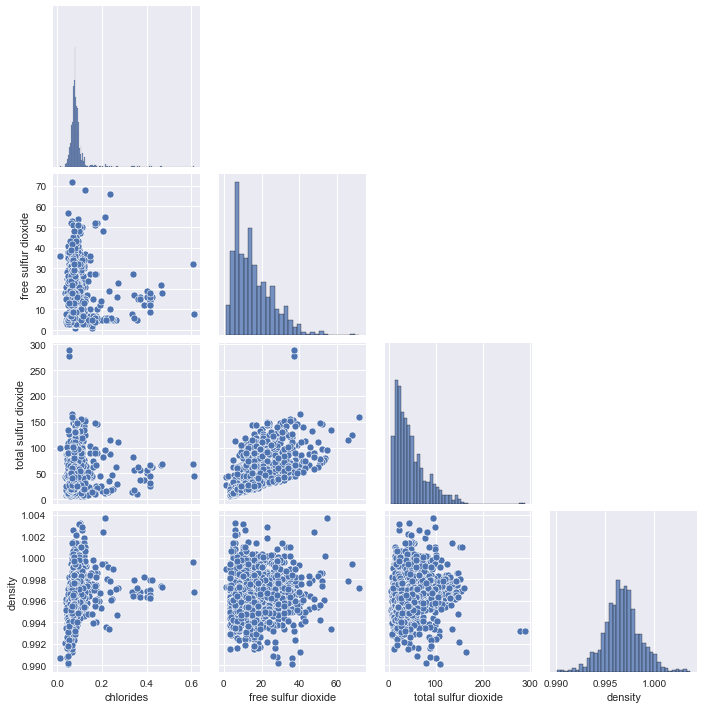

In [11]:
# Utiliza esta celda para graficar scatterplot. Tip: Utilizar pairplot de Seaborn con corner=True. 
#Puedes usar más celdas para graficar subsets

sns.pairplot(df[['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']], corner=True);

**Comentarios**

Se aprecia en los gráficos que existe una gran varianza a la hora de ver los cruces entre las variables.  
Para el caso entre chlorides y density se aprecia que datos se concentran entre 0 y 0.2 de chlorides y en ese rango se aprecia que para density los rangos de esos datos se encuentran entre 0.990 y 1.003. No se si lo anteriormente dicho es correcto debido que se aprecia que la escala de density es relativamente pequeña.


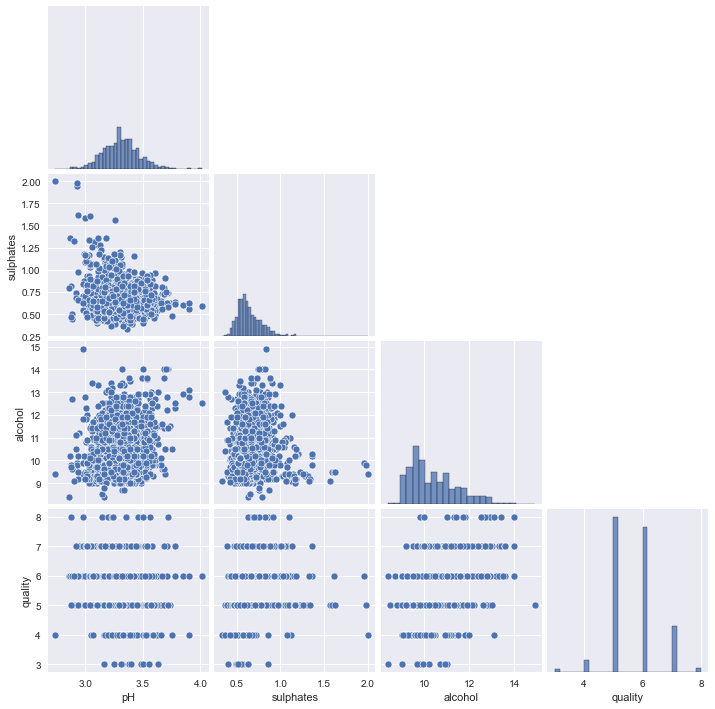

In [6]:
# Utiliza esta celda para graficar scatterplot. Tip: Utilizar pairplot de Seaborn con corner=True. 
#Puedes usar más celdas para graficar subsets

sns.pairplot(df[['pH', 'sulphates', 'alcohol', 'quality']], corner=True);

**Comentarios**

Se aprecia en los gráficos que en su gran mayoría los datos estan concentados, pero existe una cantidad no menor de datos atipicos a la hora de considerar el cruce entre las variables alcohol y sulphates con la variable ph.

### Ejercicio 3: Regularización de modelos

- Genere tres modelos, correspondientes a `RidgeCV` , `LassoCV` y `ElasticNetCV`. Para cada uno de ellos implemente los siguientes pasos:
    - Entrene los modelos con 10 validaciones cruzadas.
    - Extraiga los coeficientes estimados, el mejor valor `alpha`, MAE (`mean_absolute_error`) y RMSE (raiz cuadrada de `mean_squared_error`) asociado a cada modelo.

In [7]:
# Utiliza esta celda para entrenar los 3 modelos solicitados

#Division de los subset
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["quality"]), df["quality"], test_size=0.25 , random_state=42)


#Estandarización // Escalador
scaler = StandardScaler().fit(X_train)


#Estandarizaci+on / transformación
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


#Entrenamiento del modelo
ridge_cv = RidgeCV(cv=10).fit(X_train_std, y_train)
lasso_cv = LassoCV(cv=10).fit(X_train_std, y_train)
elastic_net_cv = ElasticNetCV(cv=10).fit(X_train_std, y_train)

In [8]:
# Utiliza esta celda para mostrar el mejor alpha y las métricas solicitadas en los 3 modelos

print(f"El mejor alpha para Ridge es {ridge_cv.alpha_}")
print(f"El mejor alpha para Lasso es {lasso_cv.alpha_}")
print(f"El mejor alpha para ElasticNet es {elastic_net_cv.alpha_}\n")

print(f"El RMSE para Ridge es {np.sqrt(mean_squared_error(ridge_cv.predict(X_test_std), y_test))}")
print(f"El RMSE para Lasso es {np.sqrt(mean_squared_error(lasso_cv.predict(X_test_std), y_test))}")
print(f"El RMSE para ElasticNet es {np.sqrt(mean_squared_error(elastic_net_cv.predict(X_test_std), y_test))}\n")

print(f"El MAE para Ridge es {np.sqrt(median_absolute_error(ridge_cv.predict(X_test_std), y_test))}")
print(f"El MAE para Lasso es {np.sqrt(median_absolute_error(lasso_cv.predict(X_test_std), y_test))}")
print(f"El MAE para ElasticNet es {np.sqrt(median_absolute_error(elastic_net_cv.predict(X_test_std), y_test))}\n")

El mejor alpha para Ridge es 10.0
El mejor alpha para Lasso es 0.008536388574770957
El mejor alpha para ElasticNet es 0.015922129110254143

El RMSE para Ridge es 0.6232266709897027
El RMSE para Lasso es 0.6256640018757761
El RMSE para ElasticNet es 0.6256375761209755

El MAE para Ridge es 0.6384943816687905
El MAE para Lasso es 0.644895757802491
El MAE para ElasticNet es 0.645772326521102



**¿Qué modelo presenta un mejor desempeño en base a las métricas?**

**Respuesta**: 

De acuerdo a los resultados de las métricas para los 3 modelos el que tiene un mejor desempeño es el modelo Ridge con un alpha de 10 su RMSE  es de 0.623 y MAE de 0.638.

In [9]:
# Utiliza esta celda para mostrar los coeficientes de los 3 modelos. Tip: Llevarlos a un DF y usar escala de color

coeficientes = pd.DataFrame({
                            "Ridge": ridge_cv.coef_.round(2), 
                            "Lasso": lasso_cv.coef_.round(2),
                            "ElasticNet": elastic_net_cv.coef_.round(2)
}, index=X_train.columns)


coeficientes.style.background_gradient(cmap='Purples').format({'Ridge': "{:.2f}", 'OLS': "{:.3f}", 'ElasticNet': "{:.3f}"})

,Ridge,Lasso,ElasticNet
fixed acidity,0.04,0.000000,0.000
volatile acidity,-0.18,-0.170000,-0.170
citric acid,-0.02,-0.000000,-0.000
residual sugar,0.01,0.000000,0.000
chlorides,-0.09,-0.080000,-0.080
free sulfur dioxide,0.05,0.030000,0.030
total sulfur dioxide,-0.12,-0.100000,-0.100
density,-0.04,-0.000000,-0.000
pH,-0.05,-0.050000,-0.050
sulphates,0.14,0.130000,0.130


**¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?**

**Respuesta:**

Los atributos que mantienen un comportamiento relativamente similar para los 3 modelos desarrollados son las variables:

acidity  
chlorides  
pH  
sulphates  
alcohol  

